# Preapare Pump Log

## Import Modules

In [1]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model

/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Get Datalog from database

In [3]:
connection = pymysql.connect(host = "mikmak.cc", user="read", passwd="809913", db="iRig")
sql = ('SELECT MsgID, msgv1, TmStp FROM sysLog WHERE msgID = "109" AND sysID = "79cf6c22-dcc6-11e5-8e77-00113217113f"')
with connection.cursor() as cursor:
    cursor.execute(sql)
connection.commit()
e_Log = cursor.fetchall()
connection.close()
e_Log

((109, '480', datetime.datetime(2014, 8, 20, 19, 56, 3)),
 (109, '480', datetime.datetime(2014, 8, 19, 19, 27, 38)),
 (109, '480', datetime.datetime(2014, 8, 18, 21, 55, 52)),
 (109, '408', datetime.datetime(2014, 8, 17, 0, 10, 30)),
 (109, '141', datetime.datetime(2014, 8, 17, 0, 3, 28)),
 (109, '51', datetime.datetime(2014, 8, 17, 0, 0, 53)),
 (109, '191', datetime.datetime(2014, 8, 16, 23, 59, 47)),
 (109, '558', datetime.datetime(2014, 8, 13, 20, 41, 4)),
 (109, '165', datetime.datetime(2014, 8, 13, 20, 31, 37)),
 (109, '50', datetime.datetime(2014, 8, 13, 20, 20, 56)),
 (109, '1168', datetime.datetime(2014, 8, 9, 19, 18, 58)),
 (109, '480', datetime.datetime(2014, 8, 7, 19, 30, 45)),
 (109, '480', datetime.datetime(2014, 8, 5, 19, 30, 45)),
 (109, '480', datetime.datetime(2014, 8, 2, 23, 4, 37)),
 (109, '660', datetime.datetime(2014, 7, 31, 18, 51, 59)),
 (109, '306', datetime.datetime(2014, 7, 31, 18, 40, 47)),
 (109, '563', datetime.datetime(2014, 7, 27, 19, 0, 54)),
 (109, '108

## Process DataLog
Summarize by Day

In [6]:
t_Log = (np.array(e_Log))

# Convert to pandas data frame and name the columns
t_Log = pd.DataFrame(data = t_Log[1:,:],
                     index = t_Log[1:,0],
                     columns =["ID","Value","Date"] )

# Convert DateTime column to datetime object (from generic) for comfortable calculations
t_Log["Date"] = t_Log["Date"].apply(pd.to_datetime)
# Convert Value column to float object (from generic) for comfortable calculations
t_Log["Value"] = t_Log["Value"].apply(pd.to_numeric)

# Summarize by Day
per = t_Log.Date.dt.to_period("D")
t_Log = t_Log.groupby(per)
t_Log = t_Log.sum()

p_Log = t_Log

,Value
Date,
2014-05-27,960.000
2014-05-28,480.000
2014-06-01,960.000
2014-06-02,12.000
2014-06-05,480.000
2014-06-06,480.000
2014-06-08,480.000
2014-06-09,480.000
2014-06-10,480.000


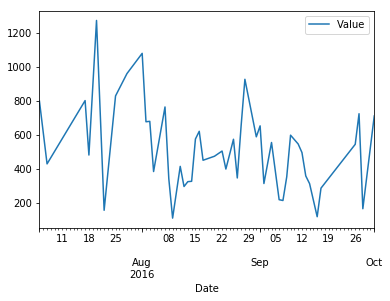

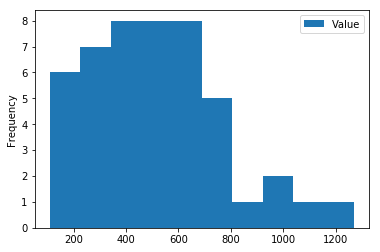

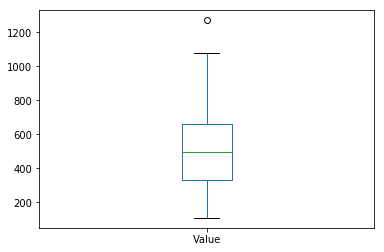

In [5]:
t_Log2016 = t_Log[(t_Log.index.year == 2016) & (t_Log.Value > 100)]
t_Log2016.plot(kind='line')
t_Log2016.plot(kind='hist')
t_Log2016.plot(kind='box')

In [ ]:
%store p_Log #Store PumpLog to a Variable visible by other notebooks